In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
condition_df1 = pd.read_csv('data\depresjon\condition\condition_1.csv')
condition_df2 = pd.read_csv('data\depresjon\condition\condition_2.csv')

In [3]:
condition_df1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [4]:
condition_df1['timestamp'] = pd.to_datetime(condition_df1['timestamp'])

In [5]:
condition_df1['timestamp'][1]

Timestamp('2003-05-07 12:01:00')

In [23]:
# this function extracts temporal features from a datetime columns
# and adds them as new columns in the dataframe

def extract_temp_features(df):
    dt_col =  df['timestamp']
    df['Date'] = dt_col.dt.date
    df['Year'] = dt_col.dt.year
    df['Month'] = dt_col.dt.month_name()
    df['Day'] = dt_col.dt.day_name()
    df['Hour'] = dt_col.dt.hour
    df['Minute'] = dt_col.dt.minute
    df['Time'] = dt_col.dt.time
    return(df)

extract_temp_features(condition_df1)

,timestamp,date,activity,Date,Year,Month,Day,Hour,Minute,Time
0,2003-05-07 12:00:00,2003-05-07,0,2003-05-07,2003,May,Wednesday,12,0,12:00:00
1,2003-05-07 12:01:00,2003-05-07,143,2003-05-07,2003,May,Wednesday,12,1,12:01:00
2,2003-05-07 12:02:00,2003-05-07,0,2003-05-07,2003,May,Wednesday,12,2,12:02:00
3,2003-05-07 12:03:00,2003-05-07,20,2003-05-07,2003,May,Wednesday,12,3,12:03:00
4,2003-05-07 12:04:00,2003-05-07,166,2003-05-07,2003,May,Wednesday,12,4,12:04:00
...,...,...,...,...,...,...,...,...,...,...
23239,2003-05-23 15:19:00,2003-05-23,0,2003-05-23,2003,May,Friday,15,19,15:19:00
23240,2003-05-23 15:20:00,2003-05-23,0,2003-05-23,2003,May,Friday,15,20,15:20:00
23241,2003-05-23 15:21:00,2003-05-23,0,2003-05-23,2003,May,Friday,15,21,15:21:00
23242,2003-05-23 15:22:00,2003-05-23,0,2003-05-23,2003,May,Friday,15,22,15:22:00


In [19]:
condition_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23244 entries, 0 to 23243
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  23244 non-null  datetime64[ns]
 1   date       23244 non-null  object        
 2   activity   23244 non-null  int64         
 3   Date       23244 non-null  object        
 4   Year       23244 non-null  int32         
 5   Month      23244 non-null  object        
 6   Day        23244 non-null  object        
 7   Hour       23244 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 1.2+ MB


In [36]:
condition_df1['Date'] = condition_df1['Date'].astype(str)
df = condition_df1[condition_df1['Date'] == "2003-05-07"]
df = df[df['Hour'] == 12]

df

,timestamp,date,activity,Date,Year,Month,Day,Hour,Minute,Time
0,2003-05-07 12:00:00,2003-05-07,0,2003-05-07,2003,May,Wednesday,12,0,12:00:00
1,2003-05-07 12:01:00,2003-05-07,143,2003-05-07,2003,May,Wednesday,12,1,12:01:00
2,2003-05-07 12:02:00,2003-05-07,0,2003-05-07,2003,May,Wednesday,12,2,12:02:00
3,2003-05-07 12:03:00,2003-05-07,20,2003-05-07,2003,May,Wednesday,12,3,12:03:00
4,2003-05-07 12:04:00,2003-05-07,166,2003-05-07,2003,May,Wednesday,12,4,12:04:00
5,2003-05-07 12:05:00,2003-05-07,160,2003-05-07,2003,May,Wednesday,12,5,12:05:00
6,2003-05-07 12:06:00,2003-05-07,17,2003-05-07,2003,May,Wednesday,12,6,12:06:00
7,2003-05-07 12:07:00,2003-05-07,646,2003-05-07,2003,May,Wednesday,12,7,12:07:00
8,2003-05-07 12:08:00,2003-05-07,978,2003-05-07,2003,May,Wednesday,12,8,12:08:00
9,2003-05-07 12:09:00,2003-05-07,306,2003-05-07,2003,May,Wednesday,12,9,12:09:00


Text(0, 0.5, 'Activity')

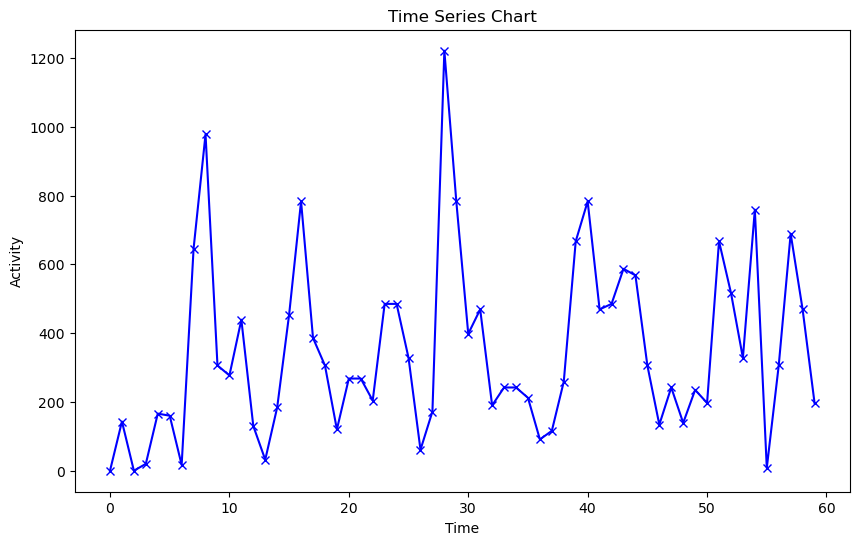

In [37]:
df['Time'] = df['timestamp'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

# Plotting the time series chart
plt.figure(figsize=(10, 6))
plt.plot(df['Minute'], df['activity'], marker='x', linestyle='-', color='b')

# Adding labels and title
plt.title('Time Series Chart')
plt.xlabel('Time')
plt.ylabel('Activity')

In [15]:
Day1

,timestamp,date,activity,Date,Year,Month,Day,Hour


In [ ]:
# plot scatterplots
sns.pairplot(condition_df2, vars= ["activity", "Hour", "Minute"]);
plt.show()

In [ ]:
plt.plot(condition_df2['Day'],condition_df2['activity'],marker="o")

In [ ]:
grouped_data = condition_df2.groupby('Month')

In [19]:
condition_df1.head(5)

,timestamp,date,activity,Date,Year,Month,Day,Hour
0,2003-05-07 12:00:00,2003-05-07,0,2003-05-07,2003,May,Wednesday,12
1,2003-05-07 12:01:00,2003-05-07,143,2003-05-07,2003,May,Wednesday,12
2,2003-05-07 12:02:00,2003-05-07,0,2003-05-07,2003,May,Wednesday,12
3,2003-05-07 12:03:00,2003-05-07,20,2003-05-07,2003,May,Wednesday,12
4,2003-05-07 12:04:00,2003-05-07,166,2003-05-07,2003,May,Wednesday,12


In [15]:
sns.boxplot(data=condition_df2, x="activity", y="Day")

ValueError: Could not interpret input 'Day'

In [23]:
Day_AVG_Activity = condition_df1.groupby("Day")["activity"].mean()
Day_AVG_Activity.head(10)

Day
Friday       119.834648
Monday       242.488542
Saturday     156.361111
Sunday        98.584375
Thursday     132.745602
Tuesday      109.981944
Wednesday    176.941667
Name: activity, dtype: float64